<a href="https://colab.research.google.com/github/CarolinaAguirre23/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: arma un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np

# Define materias
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Formación Ética y Ciudadana', 'Artes', 'Música']

# Generar datos aleatorios
num_filas = 100
apellidos = np.random.choice(['García', 'Rodríguez', 'González', 'Fernández', 'López', 'Martínez', 'Sánchez', 'Pérez', 'Gómez', 'Díaz'], size=num_filas)
nombres = np.random.choice(['Sofía', 'Martina', 'Juan', 'Mateo', 'Lucas', 'Emma', 'Olivia', 'Benjamín', 'Miguel', 'Valentina'], size=num_filas)
dni = np.random.randint(10000000, 99999999, size=num_filas)
materia_escolar = np.random.choice(materias, size=num_filas)
nota1 = np.random.randint(1, 11, size=num_filas)
nota2 = np.random.randint(1, 11, size=num_filas)
nota3 = np.random.randint(1, 11, size=num_filas)
faltas = np.random.randint(0, 15, size=num_filas)

# Crear DataFrame
data = {'Apellido': apellidos, 'Nombre': nombres, 'Nro_DNI': dni, 'Materia Escolar': materia_escolar,
        'Nota 1er Trimestre': nota1, 'Nota 2do Trimestre': nota2, 'Nota 3er Trimestre': nota3, 'Faltas a clases': faltas}
df = pd.DataFrame(data)

# Mostrar el DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Rodríguez,Emma,88999935,Historia,10,10,1,10
1,Pérez,Lucas,73029095,Lengua y Literatura,6,2,7,0
2,Gómez,Miguel,22514971,Geografía,4,10,2,5
3,Martínez,Mateo,88952490,Geografía,8,3,1,10
4,Gómez,Lucas,85467758,Historia,9,5,8,7
...,...,...,...,...,...,...,...,...
95,Sánchez,Benjamín,64709698,Matemática,4,9,5,0
96,Díaz,Juan,75183220,Formación Ética y Ciudadana,3,5,5,4
97,Sánchez,Martina,31715274,Inglés,9,10,9,12
98,Fernández,Olivia,10704224,Geografía,9,4,10,6


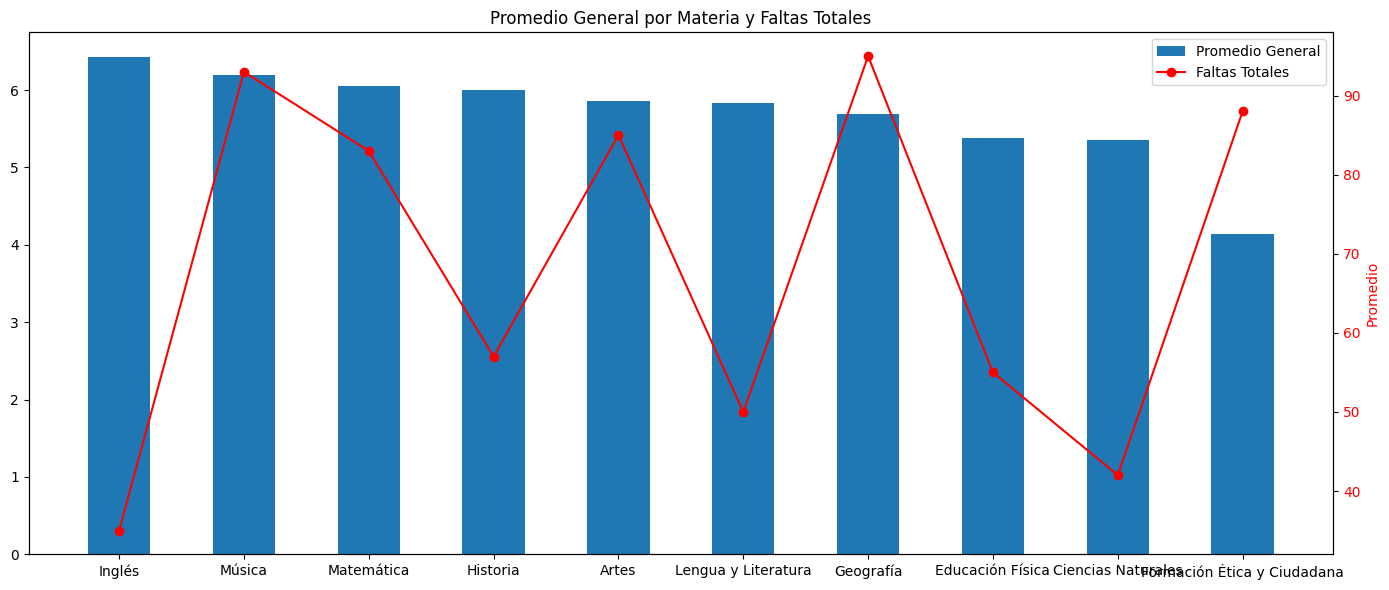

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code)

# Calcular el promedio de cada materia
promedios_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
promedios_por_materia = promedios_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()


# Crear el gráfico de barras
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(111)

# Gráfico de barras para los promedios
width = 0.5  # Ancho de las barras
x = np.arange(len(promedios_por_materia))
rects1 = ax1.bar(x, promedios_por_materia, width, label='Promedio General')

# Segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(x, faltas_por_materia, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Etiquetas y título
plt.xticks(x, promedios_por_materia.index, rotation=45, ha='right')
plt.xlabel('Materia')
plt.ylabel('Promedio')
plt.title('Promedio General por Materia y Faltas Totales')
plt.tight_layout()

# Leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)